In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

In [3]:
import numpy as np
import pandas as pd 
import sys
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 데이터 셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential,save_model, load_model 
from tensorflow.keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # loss와 acc의 학습 과정 그래프
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.preprocessing import MinMaxScaler, StandardScaler # 스케일 조정
from sklearn.model_selection import train_test_split  # 데이터 분리

In [6]:
# 1. 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

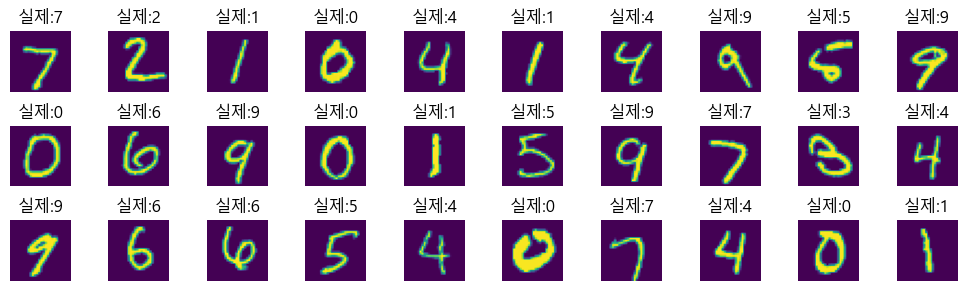

In [26]:
plt_row = 3
plt_col = 10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
# axes[0, 0].imshow(X_test[0].reshape(width, height))
# axes[0, 0].axis('off')
# title = '실제:{}'.format(y_test[0])
# axes[0, 0].set_title(title)
for i in range(plt_row*plt_col):
    subax = axes[i//plt_col, i%plt_col] # //:몫연산자 %:나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "실제:{}".format(y_test[i])
    subax.set_title(title)
plt.tight_layout()

# 1. DNN

In [31]:
%%time
# 1.데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 (28, 28) => 748 1차원 -> 실수형변환 -> 스케일 조정
X_train = X_train.reshape(-1, width*height).astype('float32')/255.0
X_val = X_val.reshape(-1, width*height).astype('float32')/255.0
X_test = X_test.reshape(-1, width*height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델 구성
model = Sequential([
    Input(shape=(width*height)),
    Dense(units=1024, activation='relu'),
    Dropout(0.3),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])
# model.summary()
# 3. 학습설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# 4. 학습
model.fit(X_train, Y_train,
          epochs=50,
          validation_data=(X_val, Y_val),
          verbose=1)

Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2679 - accuracy: 0.9190 - val_loss: 0.1300 - val_accuracy: 0.9618
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1418 - accuracy: 0.9583 - val_loss: 0.0958 - val_accuracy: 0.9705
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1110 - accuracy: 0.9662 - val_loss: 0.0917 - val_accuracy: 0.9739
Epoch 4/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0967 - accuracy: 0.9716 - val_loss: 0.1113 - val_accuracy: 0.9712
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0819 - accuracy: 0.9755 - val_loss: 0.0987 - val_accuracy: 0.9755
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0773 - accuracy: 0.9773 - val_loss: 0.0947 - val_accuracy: 0.9759
Epoch 7/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0691 - accuracy: 0.9796 - val_loss: 0.1009 -

In [32]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1544 - accuracy: 0.9834


[0.15439514815807343, 0.9833999872207642]

In [36]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print('실제값 : ',y_test)
print('실제값 : ',np.argmax(Y_test, axis=1))
yhat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

실제값 :  [7 2 1 ... 4 5 6]
실제값 :  [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 4ms/step


array([[ 974,    1,    0,    0,    0,    0,    2,    0,    2,    1],
       [   0, 1130,    2,    0,    0,    0,    1,    0,    2,    0],
       [   2,    2, 1011,    0,    2,    0,    2,    7,    6,    0],
       [   0,    0,    2,  990,    0,    3,    0,    6,    6,    3],
       [   0,    0,    1,    0,  965,    0,    6,    2,    0,    8],
       [   2,    0,    0,    4,    1,  870,    5,    1,    8,    1],
       [   3,    2,    0,    0,    3,    1,  944,    0,    5,    0],
       [   1,    0,    5,    1,    0,    0,    0, 1010,    4,    7],
       [   0,    0,    4,    3,    0,    2,    0,    2,  958,    5],
       [   1,    3,    0,    2,    7,    4,    1,    6,    3,  982]],
      dtype=int64)

In [37]:
# 실제값과 예측값이 다른 갯수(방밥1)
cnt = 0
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i != j:
            cnt += data
print('예측이 틀린 갯수 : ',cnt)

예측이 틀린 갯수 :  166


In [40]:
# 실제값돠 예측값이 다른 갯수(방법2)
cnt=0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt+=1
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  166


In [ ]:
# CNN을 사용하여 예측이 틀린 뎅이터 출력(yhat과 y_test가 다른 것들 166개)

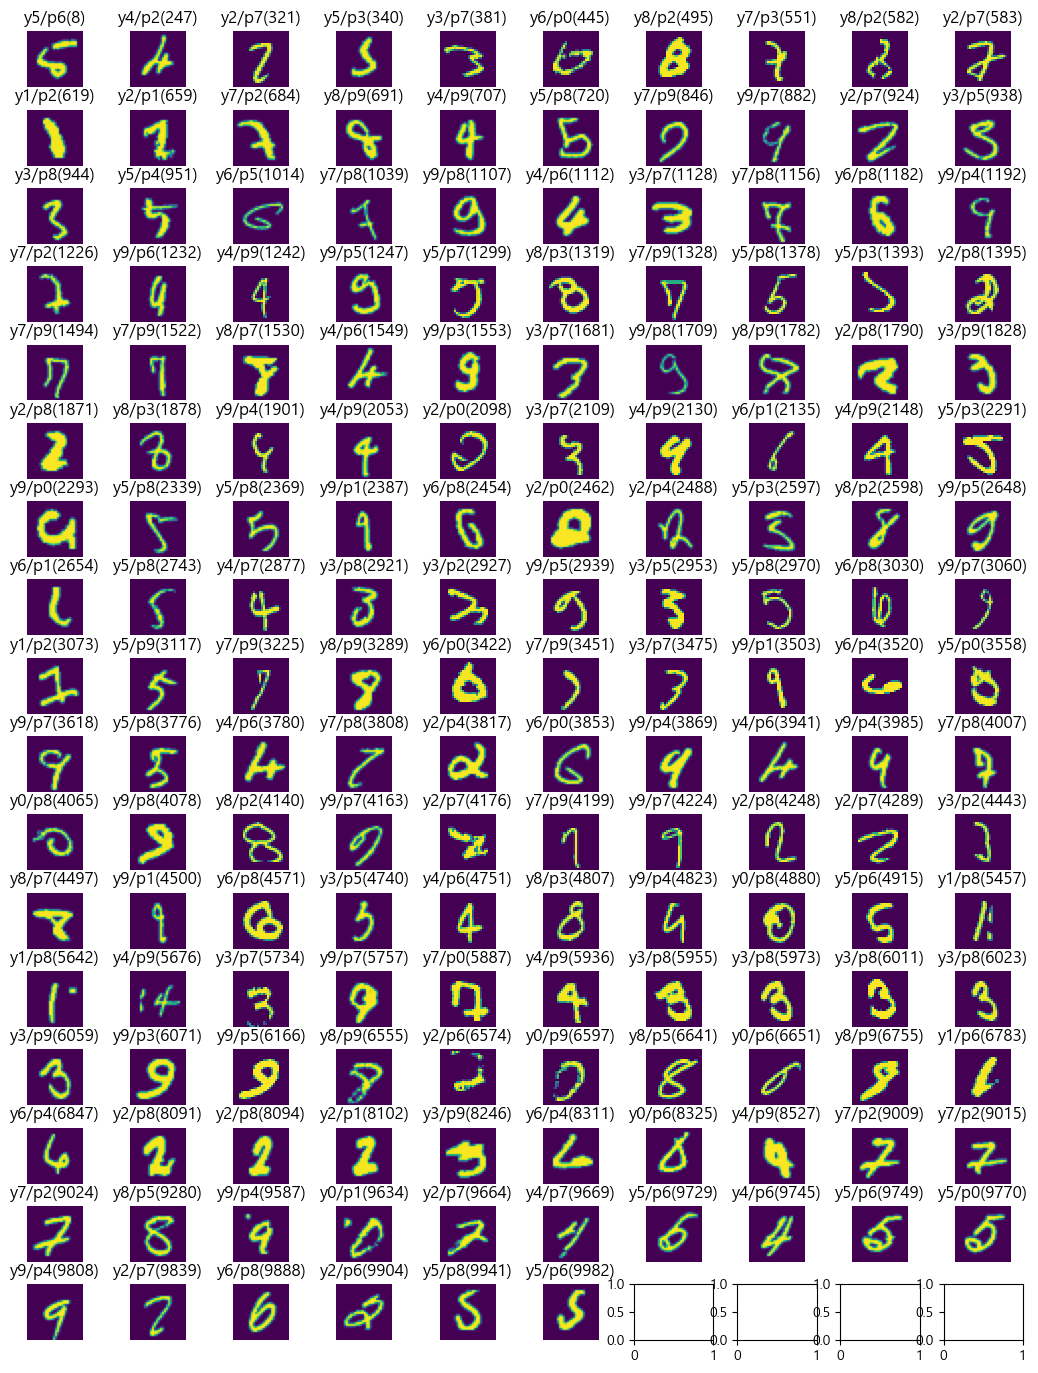

In [47]:
plt_row = 17
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col+3, plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i=0  # yhat과 y_test의 index => yhat[i], y_test[i]를 비교
cnt=0 # 이미지 출력횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col):
    if yhat[i]==y_test[i]:
        i += 1
        continue
    subax = axes[cnt//plt_col, cnt%plt_col] # //:몫연산자 %:나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y{}/p{}({})".format(y_test[i], yhat[i], i)
    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1  # index 증가
# plt.tight_layout()

# 2. CNN(컨볼루션 레이어 포함) - 교안 31page

In [48]:
%%time
# 1.데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 (28, 28) => 748 1차원 -> 실수형변환 -> 스케일 조정
X_train = X_train.reshape(-1, width*height).astype('float32')/255.0
X_val = X_val.reshape(-1, width*height).astype('float32')/255.0
X_test = X_test.reshape(-1, width*height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

CPU times: total: 391 ms
Wall time: 399 ms


((50000, 784),
 (50000, 10),
 (10000, 784),
 (10000, 10),
 (10000, 784),
 (10000, 10))

In [ ]:
# 2. 모델생성